# 2 Stationary Time Series

Definition. A **strictly** stationary time series $\{x_t:\ t\in\mathbb Z\}$ has the property that any collection of 
$\{x_{t_1},x_{t_2},\dotsc,x_{t_n}\}$ is probabilistically identical to its shifted set
$\{x_{t_1+k},x_{t_2+k},\dotsc,x_{t_n+k}\}$ (in the sense of joint distribution).

i.e. for all $n,x_{t_1},\dotsc,x_{t_n}$ and all $k,c_1,\dotsc,c_n$,

$$\mathbb P(x_{t_1}\leqslant c_1,\dotsc,x_{t_n}\leqslant c_n)
=\mathbb P(x_{t_1+k}\leqslant c_1,\dotsc,x_{t_n+k}\leqslant c_n)$$

#### Properties
* Mean function $\mu_x(t)$ is constant. This is given by the special case $n = 1$, $\mathbb P(x_t\leqslant c)=\mathbb P(x_{t+1}\leqslant c)$.

* Autocovariance only depends on the gap $\gamma(s,t) = \gamma_0(|s-t|)$. This is by $n=2$ where 
$(x_s,x_t)$ and $(x_{s+k},x_{t+k})$ share identical distributions (and therefore covariance) for all $k$.

<br>

Definition 2. A finite-variance time series $\{x_t\}$ is a **weak** stationary time series that has two properties above: constant mean function $\mu(t)$ and gap-dependent autocovariance $\gamma(s,t) =  \gamma_0(|s-t|)$. 

Sometimes the word 'weak' is omitted and we by phrase 'stationary time series' refer to a weak stationary time series.

#### Notations

* Mean function $\mu(t)\equiv \mu$.
* Autocovariance $\gamma(s,t) = \gamma(s-t)$.
* Autocorrelation $\rho(s,t) = \rho(s-t) = \frac{\gamma(s-t)}{\gamma (0)}$.

#### Autocovariance

Autocovariance of a stationary time series has several properties as follows.

1. $\gamma(0) = {\rm Var}(x_t)$.
2. $|\gamma(h)|\leqslant \gamma(0)$.
3. $\gamma(h) = \gamma(-h)$.
4. $\gamma$ is positive semidefinite by the positive semidefinite matrix $[\gamma(i-j)]\in \mathbb R^{n\times n}$ for $\forall n$.

This is because
$$\sum_{i=1}^n\sum_{j=1}^n \gamma(i-j)a_ia_j=\sum_{i=1}^n\sum_{j=1}^n {\rm Cov}(a_ix_i,a_jx_j)
={\rm Var}(\sum_{i=1}^n a_ix_i)\geqslant 0.$$

### Examples

#### White Noise

White noise $w_i\sim N(0,\sigma^2)$ is strictly stationary. $\gamma(h) = \delta_{h0}\sigma^2$ where $\delta$ is the Dirac function.

#### Moving Average 

Moving average is strictly stationary as it has zero mean and the covariance is determined by the overlapping interval. 

#### Random Walk with Drift

Random walk with drift is **not** stationary even $\delta = 0$ because the autocovariance depends on $\min\{s,t\}$.

## Joint Stationary

Two time series $\{x_t\},\{y_t\}$ are called joint stationary iff $x_t$ is stationary, $y_t$ is stationary and also
$\gamma_{xy}(s,t) = {\rm Cov}(x_{s},y_t) = \gamma_0(s-t)$ is a function of the gap $h=s-t$.

#### Cross-correlation

Cross-correlation of joint stationary series has the properties that

1. $-1\leqslant \rho_{xy}(h)\leqslant 1$.
2. $\rho_{xy}(h) = \rho_{yx}(-h)$.

### Examples

#### Combinations of White Noise

$x_t = w_t + w_{t-1}$ and $y_t = w_t - w_{t-1}$ are joint stationary.

#### Prediction with CCF

Suppose $y_t = Ax_{t- l}+w_t$ and $x_t,w_t$ are uncorrelated and $x_t$ is stationary. If $l>0$ then we call $x_t$ leads $y_t$ by $l$. 

$$\gamma_{yx}(h) = {\rm Cov}(y_{t+h},x_t) = 
{\rm Cov}(Ax_{t+h-l}+w_{t+h},x_t)=A\gamma_x(h-l)$$

Hence $y = \gamma_{yx}(h)$ is symmetric by vertical line $h = l$ and has global maximum or minimum at $h = l$.

null device 
          1

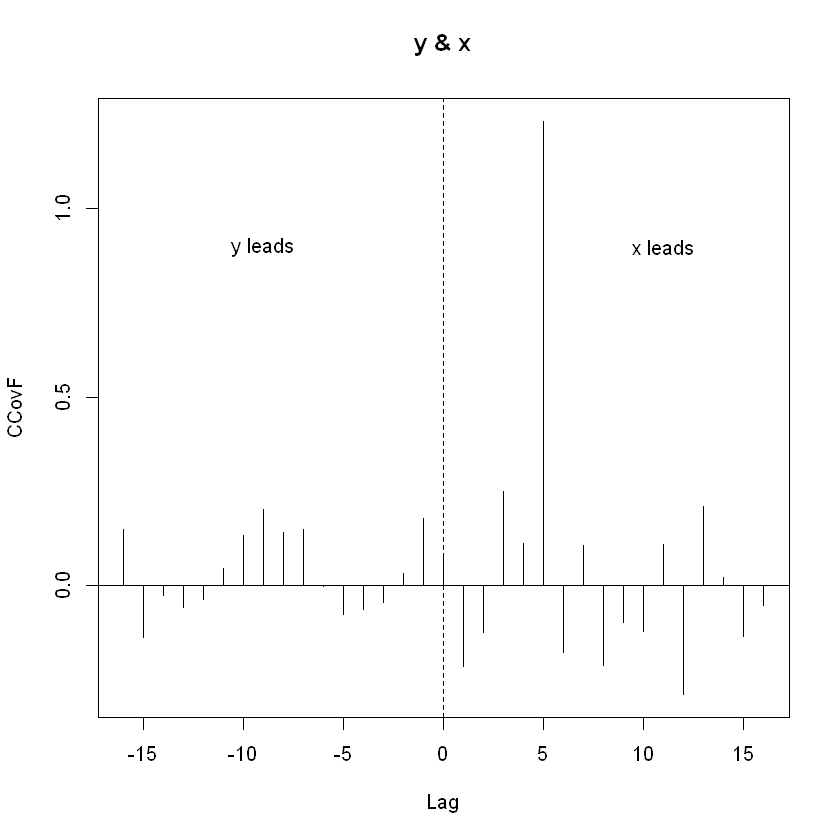

In [1]:
library(astsa)

####################
# Example 1.24 Prediction with cross-correlation
set.seed(2)
x = rnorm(100)
y = lag(x, -5) + rnorm(100)
ccf(y, x, ylab='CCovF', type='covariance')
abline(v=0, lty=2)
text(11, .9, 'x leads')
text(-9, .9, 'y leads')
dev.off()

null device 
          1

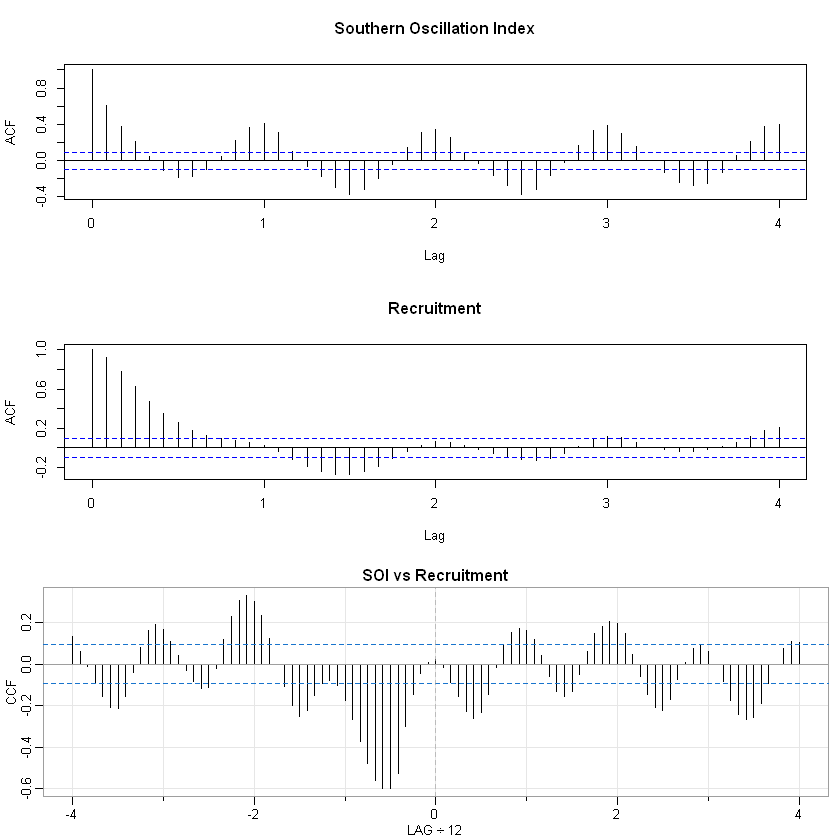

In [16]:
par(mfrow=c(3,1))
acf(soi, 48, main="Southern Oscillation Index")
acf(rec, 48, main="Recruitment")
ccf2(soi, rec, 48, main="SOI vs Recruitment")
dev.off()

## Linear Process

Suppose the sum of coefficients are absolutely convergent $|\sum_{i=-\infty}^{\infty} \psi_i|<\infty$, if $w_i\sim N(0,\sigma^2)$ are uncorrelated white noises, define
$$x_t = \mu + \sum_{i=-\infty}^{\infty} \psi_i w_{t-i}$$

It is a generalization of ARMA (auto regression moving average). Each $x_t$ has dependence on the past, present and future.


Properties

* $\mu_t = \mathbb E (x_t) = \mu$
* $\gamma(h) = \sigma^2 \sum_{i=1}^{\infty} \psi_{i+h}\psi_i$. 
  

## Gaussian Process

$$x_t\sim {\rm GP}(\mu(t), k(s,t))$$

Any finite collections of points $t_1,\dotsc,t_n$ has the property that

$$x=(x_{t_1},\dotsc,x_{t_n})^T\sim N_n\left(\left(\begin{matrix}\mu_{t_1}\\ \vdots\\\mu_{t_n}\end{matrix}\right),
\left(k_{t_i,t_j}\right)_{1\leqslant i,j\leqslant n}\right)$$

## Estimation of Correlation

Estimate correlation of a stationary time series by samples. 

Metrics
* Unbiasness
* Consistency
* Asymtotical normality

#### Mean function

By plugin estimation, we have the estimation given as follows. 
$$\mu_t = \mathbb E(x_t),\quad \hat \mu_t = \frac{1}{n}\sum_{t=1}^n x_{t}$$

The variance of the estimator is given by 

$${\rm Var}\left[\frac{1}{n}\sum_{t=1}^n (x_t - \mu)\right]=\frac{1}{n^2}{\rm Cov}(\sum_{t=1}^n x_t,\sum_{t=1}^n x_t)
=\frac{1}{n^2}\left(n\gamma(0)+2\sum_{h=1}^n (n-h)\gamma(h)\right)
$$


#### Autocovariance function

Given the estimator below, we shall note that larger $h$ leads to smaller samples available and therefore less accuracy. Here we prefer use $\frac{1}{n}$ rather $\frac{1}{n-h}$ because this enables $\hat \gamma$ to preserve the positive semidefinite property of $\gamma$. Also $\lim_{n\rightarrow \infty}\frac{n}{n-h}=1$ so the biasness eliminates if $n$ is sufficiently large.
$$\gamma(h) = \mathbb E[(x_{t+h}-\mu)(x_t - \mu)]\\
\hat\gamma (h) = \frac{1}{n}\sum_{t=1}^{n-h} (x_{t+h}-\hat \mu)(x_t - \hat \mu)$$

#### Autocorrelation function

$$\hat \rho (h) = \frac{\hat \gamma(h)}{\hat \gamma(0)}$$

Particularly, if $x_t$ is $w_t\sim N(0,1)$, then its asymptotical normality reveals that 
$$\sqrt n\hat \rho(h) \stackrel{d}{\longrightarrow} N(0,1)$$

#### Cross-covariance function

When $h>0$, 
$$\hat \gamma_{xy}(h) = \frac 1n\sum_{t=1}^{n-h} (x_{t-h} - \overline x)(y_t - \overline y)\\
\hat \gamma_{xy}(-h) = \gamma_{yx}(h)$$

#### Cross-correlation function

$$\hat \rho_{xy}(h) = \frac{\hat \gamma_{xy}(h)}{\sqrt{\hat \gamma_x(0)\hat \gamma_y(0)}}$$

Particularly, if at least one of $x_t$ and $y_t$ is white noise, then 
$$\sqrt n\hat \rho_{xy}(h) \stackrel{d}{\longrightarrow} N(0,1)$$